<a href="https://colab.research.google.com/github/fmonteci/Challenge_2-Telecom_FM/blob/main/Challenge2_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
import requests
import json

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

#Extracción de datos

In [9]:
datos=requests.get("https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json")

In [13]:
resultado=json.loads(datos.text)
df=pd.DataFrame(resultado)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#Conociendo los datos

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [86]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [26]:
datos=df #respaldo de df
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#Normalizando

In [33]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

In [34]:
df_normalizado = pd.concat([
    df.drop(columns=['customer', 'phone', 'internet', 'account']),
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

In [35]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [39]:
df_normalizado.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
6060,8267-ZNYVZ,Yes,Female,0,Yes,No,33,Yes,No,Fiber optic,...,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,103.75,3361.05
2590,3612-YVGSJ,No,Female,0,Yes,No,71,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.45,1681.6
1466,2101-RANCD,No,Female,0,No,No,55,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,73.10,4144.9
6544,8992-OBVDG,No,Male,0,No,No,21,Yes,No,DSL,...,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.6
910,1282-IHQAC,No,Male,1,No,No,70,No,No phone service,DSL,...,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),44.05,3011.65
4957,6770-XUAGN,Yes,Female,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.00,21
6036,8237-ULIXL,No,Female,0,Yes,No,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.85,1871.85
3835,5244-IRFIH,Yes,Male,1,Yes,No,33,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.50,3105.55
4791,6563-VNPMN,No,Female,1,No,No,45,Yes,No,Fiber optic,...,Yes,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),85.70,3778.1
2597,3627-FCRDW,Yes,Female,0,No,No,9,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Electronic check,71.00,672.55


In [36]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [37]:
df_normalizado.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


#Manejo de inconsistencia
##Transformación de columnas

In [38]:
df_normalizado.duplicated().sum()

np.int64(0)

In [93]:
columnas=['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total']
for x in columnas:
    print("-------------")
    print(x)
    print(df_normalizado[x].unique())

-------------
customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
-------------
Churn
[ 0.  1. nan]
-------------
gender
[1 0]
-------------
SeniorCitizen
[0 1]
-------------
Partner
[1 0]
-------------
Dependents
[1 0]
-------------
tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
-------------
PhoneService
[1 0]
-------------
MultipleLines
['No' 'Yes' 'No phone service']
-------------
InternetService
['DSL' 'Fiber optic' 'No']
-------------
OnlineSecurity
['No' 'Yes' 'No internet service']
-------------
OnlineBackup
['Yes' 'No' 'No internet service']
-------------
DeviceProtection
['No' 'Yes' 'No internet service']
-------------
TechSupport
['Yes' 'No' 'No internet service']
-------------
StreamingTV
['Yes' 'No' 'No internet service']
-------------
StreamingMovi

##Estandarización y transformación de datos

In [51]:
df_normalizado["Churn"]=df_normalizado["Churn"].str.strip().replace({"Yes":1,"No":0,"":np.nan})

/tmp/ipython-input-2559235967.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado["Churn"]=df_normalizado["Churn"].str.strip().replace({"Yes":1,"No":0,"":np.nan})


In [56]:
df_normalizado["gender"]=df_normalizado["gender"].str.strip().replace({"Female":1,"Male":0})

/tmp/ipython-input-538424073.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado["gender"]=df_normalizado["gender"].str.strip().replace({"Female":1,"Male":0})


In [65]:
df_normalizado["Partner"]=df_normalizado["Partner"].str.strip().replace({"Yes":1,"No":0})

/tmp/ipython-input-1285513005.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado["Partner"]=df_normalizado["Partner"].str.strip().replace({"Yes":1,"No":0})


In [82]:
df_normalizado["Dependents"]=df_normalizado["Dependents"].str.strip().replace({"Yes":1,"No":0,"":np.nan})

/tmp/ipython-input-1950244222.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado["Dependents"]=df_normalizado["Dependents"].str.strip().replace({"Yes":1,"No":0,"":np.nan})


In [84]:

df_normalizado["PhoneService"]=df_normalizado["PhoneService"].str.strip().replace({"Yes":1,"No":0,"":np.nan})
df_normalizado["PaperlessBilling"]=df_normalizado["PaperlessBilling"].str.strip().replace({"Yes":1,"No":0,"":np.nan})


/tmp/ipython-input-573341695.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado["PhoneService"]=df_normalizado["PhoneService"].str.strip().replace({"Yes":1,"No":0,"":np.nan})
/tmp/ipython-input-573341695.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado["PaperlessBilling"]=df_normalizado["PaperlessBilling"].str.strip().replace({"Yes":1,"No":0,"":np.nan})


In [180]:
#float64 'Charges.Total'
df_normalizado["Charges.Total"]=df_normalizado["Charges.Total"].str.strip().replace({"":np.nan})
df_normalizado["Charges.Total"]=df_normalizado["Charges.Total"].astype(float)



##Quitando Mayusculas y espacios iniciales y finales

In [97]:
for i in df_normalizado.columns:
    if df_normalizado[i].dtype==object:
        df_normalizado[i]=df_normalizado[i].astype(str).str.lower().replace(r'^\s+|\s+$', '', regex=True)


In [98]:
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-orfbo,0.0,1,0,1,1,9,1,no,dsl,...,yes,no,yes,yes,no,one year,1,mailed check,65.60,593.3
1,0003-mknfe,0.0,0,0,0,0,9,1,yes,dsl,...,no,no,no,no,yes,month-to-month,0,mailed check,59.90,542.4
2,0004-tlhlj,1.0,0,0,0,0,4,1,no,fiber optic,...,no,yes,no,no,no,month-to-month,1,electronic check,73.90,280.85
3,0011-igkff,1.0,0,1,1,0,13,1,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,1,electronic check,98.00,1237.85
4,0013-exchz,1.0,1,1,1,0,3,1,no,fiber optic,...,no,no,yes,yes,no,month-to-month,1,mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,0.0,1,0,0,0,13,1,no,dsl,...,no,no,yes,no,no,one year,0,mailed check,55.15,742.9
7263,9992-rramn,1.0,0,0,1,0,22,1,yes,fiber optic,...,no,no,no,no,yes,month-to-month,1,electronic check,85.10,1873.7
7264,9992-ujoel,0.0,0,0,0,0,2,1,no,dsl,...,yes,no,no,no,no,month-to-month,1,mailed check,50.30,92.75
7265,9993-lhieb,0.0,0,0,1,1,67,1,no,dsl,...,no,yes,yes,no,yes,two year,0,mailed check,67.85,4627.65


#Columna de Cuentas Diarias

In [99]:
df_normalizado["Cuentas_Diarias"]=df_normalizado["Charges.Monthly"]/30
df_normalizado.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
6973,9605-wgjvw,0.0,1,1,0,0,1,1,no,fiber optic,...,no,no,no,no,month-to-month,1,electronic check,70.20,70.2,2.340000
3193,4458-kvrbj,0.0,0,0,0,0,59,1,yes,no,...,no internet service,no internet service,no internet service,no internet service,two year,0,mailed check,25.00,1510.5,0.833333
6974,9606-pbkbq,1.0,0,1,1,0,32,1,yes,fiber optic,...,no,no,no,yes,month-to-month,1,electronic check,85.00,2642.05,2.833333
4790,6559-rakoz,0.0,0,0,1,1,49,1,yes,fiber optic,...,no,yes,yes,yes,one year,1,electronic check,97.95,4917.9,3.265000
6094,8329-gwvpj,0.0,1,0,1,1,50,1,no,fiber optic,...,no,no,no,no,month-to-month,1,bank transfer (automatic),69.75,3557.7,2.325000
103,0177-pxbat,0.0,0,1,1,0,33,1,yes,fiber optic,...,yes,yes,yes,yes,month-to-month,1,bank transfer (automatic),109.90,3694.7,3.663333
3720,5131-ponji,0.0,0,0,1,1,49,1,no,fiber optic,...,yes,no,yes,no,month-to-month,1,credit card (automatic),90.40,4494.65,3.013333
1824,2599-czabp,0.0,0,0,1,0,14,1,no,dsl,...,no,no,no,no,one year,0,electronic check,44.60,641.25,1.486667
5254,7164-bptut,0.0,0,0,0,1,57,1,yes,dsl,...,yes,yes,yes,yes,two year,0,mailed check,89.55,5012.35,2.985000
1314,1897-okvmw,0.0,1,0,1,1,64,1,yes,dsl,...,yes,yes,yes,yes,two year,1,mailed check,90.60,5817.45,3.020000


#Análisis Descriptivo

- 49,42% de la muestra son mujeres
- 48,41% de la muetra esta casado
- 26,53% de la muestra se ha dado de baja
- 16.26% son ciudadnos senior
- 30,01% de la muestra tiene hijos
- 90,27% de la muestra tiene servicio telefonico
- 59,32% de la muestra recibe boleta electronica
- el tiempo promedio de permanencia en la organizacion es de 32.34 meses, con un leve sesgo a la derecha media mayor a mediana, no se aprecian outliers iqr superior =124
-el gasto mensual promedio es de 64,72 dolares, con un leve sesgo a la izquierda (mayor concentracion en gastos levemente menores a la mediana). No se observan outliers
- el gasto diario promedio es de 2.15 dolares muy cercano a su mediana, leve sesgo a la izquierda

**Dispersión**

- alta dispercion respecto de la media en la variable ciudadano senior 226,91%
- alta dispercion respceto de la media en la variable churn 166,39%
- alta dispercion respceto de la media en la variable cliente con dependientes 152.72%
- relativamente baja dispersion respecto de la media en la variable charge monthly 46.55% y por consecuencia cuentas diarias
- relativamente baja dispersion respecto de la media en la variable phone service 32.83%

In [100]:
df_normalizado.describe()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Cuentas_Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.494289,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2.157337
std,0.441561,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,2.343333
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,2.995833
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.958333


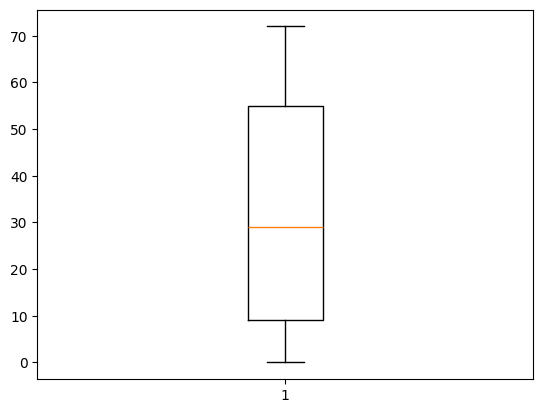

In [101]:
plt.boxplot(df_normalizado["tenure"])
plt.show()

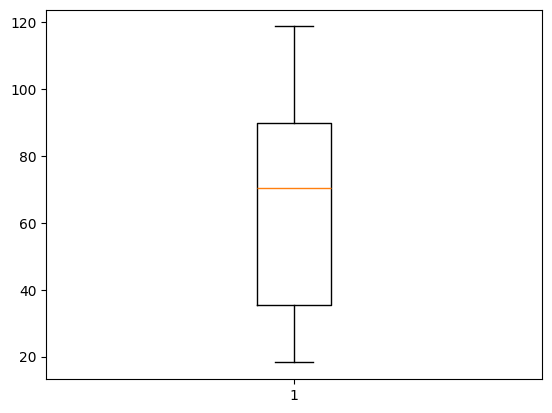

In [103]:
plt.boxplot(df_normalizado["Charges.Monthly"])
plt.show()

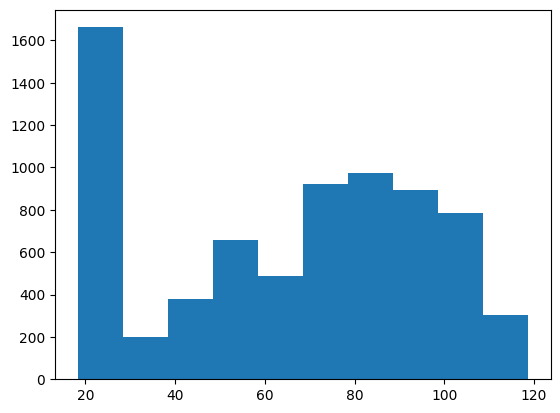

In [104]:
plt.hist(df_normalizado["Charges.Monthly"])
plt.show()

In [105]:
df_normalizado.dtypes

,0
customerID,object
Churn,float64
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,object
InternetService,object


In [106]:
for i in df_normalizado.columns:
    if df_normalizado[i].dtype!=object:
        print("------Coeficientes de Variación-------")
        print(i)
        print(df_normalizado[i].std()/df_normalizado[i].mean())



------Coeficientes de Variación-------
Churn
1.6639466409705161
------Coeficientes de Variación-------
gender
1.0115570728722285
------Coeficientes de Variación-------
SeniorCitizen
2.269088508263804
------Coeficientes de Variación-------
Partner
1.032380246014699
------Coeficientes de Variación-------
Dependents
1.5271800020250819
------Coeficientes de Variación-------
tenure
0.7596424500032838
------Coeficientes de Variación-------
PhoneService
0.3283126908037543
------Coeficientes de Variación-------
PaperlessBilling
0.8281196440242995
------Coeficientes de Variación-------
Charges.Monthly
0.4655365636872906
------Coeficientes de Variación-------
Cuentas_Diarias
0.465536563687288


#Distribución de Churn

In [127]:
import plotly.express as px

# Calcular proporciones
conteo = df_normalizado["Churn"].value_counts().sort_index()
labels = ['Clientes Retenidos', 'Clientes de Baja']
values = conteo.values

# Crear gráfico de pastel
fig = px.pie(
    names=labels,
    values=values,
    title='Distribución de Churn: clientes retenidos y de baja',
    hole=0.3,
    color_discrete_sequence=px.colors.qualitative.Set3,

)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#Recuento de evasión por variables categóricas

In [141]:
from sqlalchemy import create_engine, MetaData, table, inspect, text

In [144]:
engine=create_engine("sqlite:///:memory:")
df_normalizado.to_sql("df_normalizado",con=engine)

7267

In [166]:
Inspector=inspect(engine)
Inspector.get_table_names()

['df_normalizado']

In [167]:
query="Select iif(gender=1,'F','M') as 'Género', Contract as 'T_Contrato', PaymentMethod as 'Met._Pago', sum(Churn) as 'Clientes_abandono', round(100*sum(churn)/(select count(*) from df_normalizado where Churn=1),2) as '%_Clientes_Abandono' from df_normalizado where Churn=1 group by gender, Contract,PaymentMethod"
df_sql_recuento=pd.read_sql(query,con=engine)
df_sql_recuento

,Género,T_Contrato,Met._Pago,Clientes_abandono,%_Clientes_Abandono
0,M,month-to-month,bank transfer (automatic),89.0,4.76
1,M,month-to-month,credit card (automatic),75.0,4.01
2,M,month-to-month,electronic check,502.0,26.86
3,M,month-to-month,mailed check,147.0,7.87
4,M,one year,bank transfer (automatic),21.0,1.12
5,M,one year,credit card (automatic),19.0,1.02
6,M,one year,electronic check,41.0,2.19
7,M,one year,mailed check,10.0,0.54
8,M,two year,bank transfer (automatic),12.0,0.64
9,M,two year,credit card (automatic),7.0,0.37


#Conteo de evasión por variable numérica

In [172]:
df_normalizado.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

In [182]:
var_num=["Churn","tenure","Charges.Monthly","Charges.Total"]
df_numeros=df_normalizado[var_num]
df_numeros.dtypes
df_corr=df_numeros.corr()

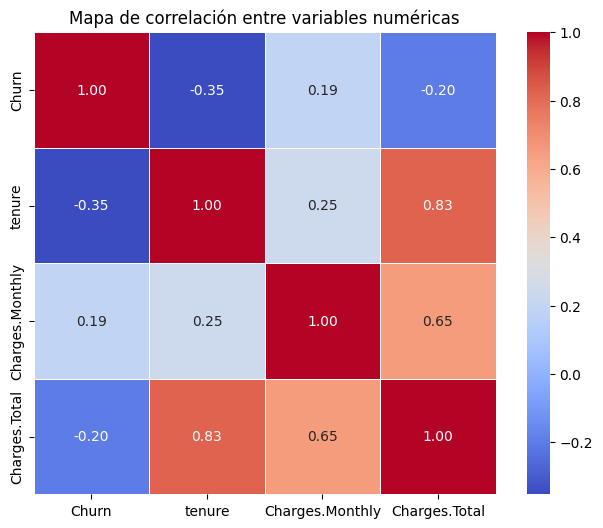

In [184]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Mapa de correlación entre variables numéricas")
plt.show()